### Описание датасета:
Этот набор данных содержит цены на дома в Нью-Йорке, что дает ценную информацию о рынке недвижимости в регионе. Он включает в себя такую информацию, как названия брокеров, типы домов, цены, количество спален и ванных комнат, площадь недвижимости, адреса, штат, административные и местные районы, названия улиц и географические координаты.

### Поля таблицы

BROKERTITLE: Title of the broker

TYPE: Type of the house

PRICE: Price of the house

BEDS: Number of bedrooms

BATH: Number of bathrooms

PROPERTYSQFT: Square footage of the property

ADDRESS: Full address of the house

STATE: State of the house

MAIN_ADDRESS: Main address information

ADMINISTRATIVE_AREA_LEVEL_2: Administrative area level 2 information

LOCALITY: Locality information

SUBLOCALITY: Sublocality information

STREET_NAME: Street name

LONG_NAME: Long name

FORMATTED_ADDRESS: Formatted address

LATITUDE: Latitude coordinate of the house

LONGITUDE: Longitude coordinate of the house

#### Импортируем небходимые библиотеки

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import geopandas as gpd

#### Считаем файл с данными, уберем дубликаты, приведем типы, исправим некоторые поля для удобства

In [44]:
houses = pd.read_csv('NY-House-Dataset.csv')
print(f'Dataset contains {houses.shape[0]} rows and {houses.shape[1]} colomns')
houses.sample(3)

Dataset contains 4801 rows and 17 colomns


,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
4220,Brokered by Living NY - Main Office,Condo for sale,625000,1,1.0,692.000000,300 W 135th St Apt 4L,"New York, NY 10030","300 W 135th St Apt 4LNew York, NY 10030",New York,New York County,New York,Manhattan,300,"300 W 135th St #4l, New York, NY 10030, USA",40.816654,-73.947357
1974,Brokered by ProBase Real Estate,House for sale,499000,3,2.0,1786.000000,81 Park Hill Ct,"Staten Island, NY 10304","81 Park Hill CtStaten Island, NY 10304",United States,New York,Richmond County,Staten Island,Park Hill Court,"81 Park Hill Ct, Staten Island, NY 10304, USA",40.617852,-74.075886
929,Brokered by RE MAX Edge,Multi-family home for sale,998000,11,6.0,2184.207862,3724 Flatlands Ave,"Brooklyn, NY 11234","3724 Flatlands AveBrooklyn, NY 11234",United States,New York,Kings County,Brooklyn,Flatlands Avenue,"3724 Flatlands Ave, Brooklyn, NY 11234, USA",40.618641,-73.938933


In [45]:
houses.duplicated()
houses = houses.drop_duplicates()

In [47]:
houses['BATH'] = houses['BATH'].astype(np.int64)
houses['PROPERTYSQFT'] = houses['PROPERTYSQFT'].astype(np.int64)
houses['BROKERTITLE'] = houses['BROKERTITLE'].str.replace('Brokered by', '')
houses['TYPE'] = houses['TYPE'].str.replace('for sale', '')

In [48]:
houses.sample(3)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
1999,RE MAX Distinguished Homes & Properties,Multi-family home,1300000,14,6,5103,1565 Saint Peters Ave,"Bronx, NY 10461","1565 Saint Peters AveBronx, NY 10461",United States,New York,Bronx County,The Bronx,Saint Peters Avenue,"1565 St Peters Ave, Bronx, NY 10461, USA",40.840384,-73.847818
4454,Momentum Real Estate LLC,House,499000,3,2,1024,140 Kiswick St,"Staten Island, NY 10306","140 Kiswick StStaten Island, NY 10306",United States,New York,Richmond County,Staten Island,Kiswick Street,"140 Kiswick St, Staten Island, NY 10306, USA",40.575760,-74.094358
2100,ISLA - Island Advantage Realty LLC,Townhouse,1299900,6,4,2504,13 Lake Ave,"Staten Island, NY 10303","13 Lake AveStaten Island, NY 10303",United States,New York,Richmond County,Staten Island,Lake Avenue,"13 Lake Ave, Staten Island, NY 10303, USA",40.636611,-74.150256


In [49]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4587 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4587 non-null   object 
 1   TYPE                         4587 non-null   object 
 2   PRICE                        4587 non-null   int64  
 3   BEDS                         4587 non-null   int64  
 4   BATH                         4587 non-null   int64  
 5   PROPERTYSQFT                 4587 non-null   int64  
 6   ADDRESS                      4587 non-null   object 
 7   STATE                        4587 non-null   object 
 8   MAIN_ADDRESS                 4587 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4587 non-null   object 
 10  LOCALITY                     4587 non-null   object 
 11  SUBLOCALITY                  4587 non-null   object 
 12  STREET_NAME                  4587 non-null   object 
 13  LONG_NAME              

#### Выведем статичтические данные по численным полям

In [50]:
houses.describe().T.style.background_gradient('Greens')

,count,mean,std,min,25%,50%,75%,max
PRICE,4587.000000,2381171.682363,32068307.750561,2494.000000,499000.000000,825000.000000,1498500.000000,2147483647.000000
BEDS,4587.000000,3.365816,2.628808,1.000000,2.000000,3.000000,4.000000,50.000000
BATH,4587.000000,2.354262,1.970637,0.000000,1.000000,2.000000,3.000000,50.000000
PROPERTYSQFT,4587.000000,2177.642686,2283.095363,230.000000,1200.000000,2184.000000,2184.000000,65535.000000
LATITUDE,4587.000000,40.713932,0.087738,40.499546,40.638588,40.726667,40.771913,40.912729
LONGITUDE,4587.000000,-73.941584,0.101276,-74.253033,-73.987420,-73.949116,-73.869455,-73.702450


### Посмотрим расположение представленных домов на карте

In [51]:
coords = houses.drop_duplicates(subset=['LATITUDE', 'LONGITUDE'])
geometry = gpd.points_from_xy(coords.LONGITUDE, coords.LATITUDE)
geo_df = gpd.GeoDataFrame(coords[['LATITUDE', 'LONGITUDE']],
                         geometry=geometry)

data_map = folium.Map()
geo_df_list = [[point.xy[1][0],point.xy[0][0]] for point in geo_df.geometry]

for coordinates in geo_df_list:
    data_map.add_child(folium.CircleMarker(location=coordinates, 
                                           radius=2,
                                          weight=4,
                                          zoom=2,
                                          color='blue'))
    
data_map.fit_bounds(data_map.get_bounds())
data_map

### Выясним какой тип домов самый популярный для продажи

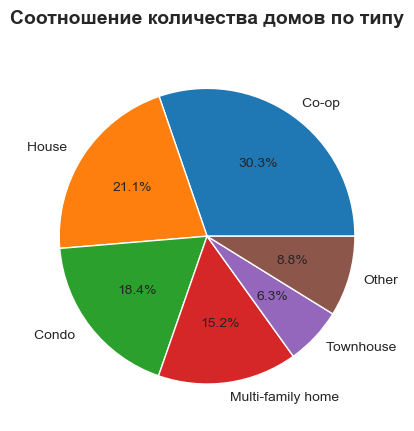

In [52]:
types = houses['TYPE'].value_counts(normalize=True)*100
small_types = types[types <= 5].index
types["Other"] = types[small_types].sum()
types = types.drop(small_types)

sns.set_style('whitegrid')
plt.pie(types, labels=types.index, autopct='%1.1f%%')
plt.title("Соотношение количества домов по типу", fontsize=14, fontweight='bold', loc='center', pad=20)
plt.show()

### Посмотрим на зависимость количества кв. м. от цены

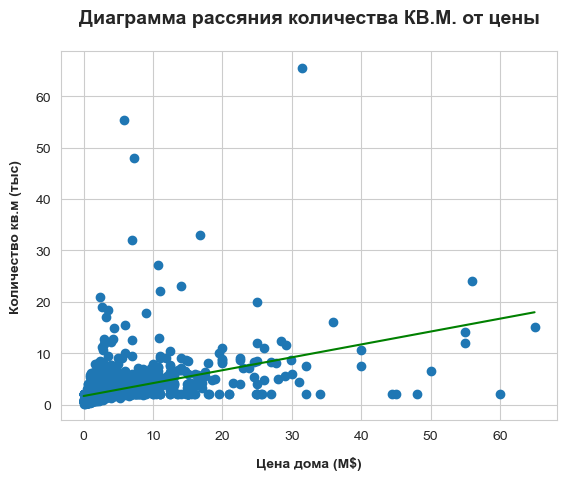

In [53]:
price_sq = houses[["PRICE", "PROPERTYSQFT"]].sort_values(by='PRICE', ignore_index=True)
price_sq = price_sq[price_sq["PRICE"]<100_000_000]

x=(price_sq["PRICE"]/1000000).values
y=(price_sq["PROPERTYSQFT"]/1000).values
plt.scatter(x, y)

slope, intercept = np.polyfit(x, y, 1)
plt.plot(x, slope*np.array(x) + intercept, color='green')

sns.set_style('whitegrid')
plt.title("Диаграмма рассяния количества КВ.М. от цены", fontsize=14, fontweight='bold', loc='center', pad=20)
plt.ylabel("Количество кв.м (тыс)", fontweight='bold', labelpad=10)
plt.xlabel("Цена дома (М$)", fontweight='bold', labelpad=10)
plt.show()

### Найдем коэффициент корреляции  и коэф. детерминации

In [54]:
coef_cor = round(np.corrcoef(x, y)[0, 1], 2)
coef_determ = round(coef_cor ** 2, 2)
print(f'Коэффициент корреляции R: {coef_cor}\nКоэффициент детерминации R^2: {coef_determ}')

Коэффициент корреляции R: 0.45
Коэффициент детерминации R^2: 0.2


### Узнаем, где выставлено больше всего домов на продажу

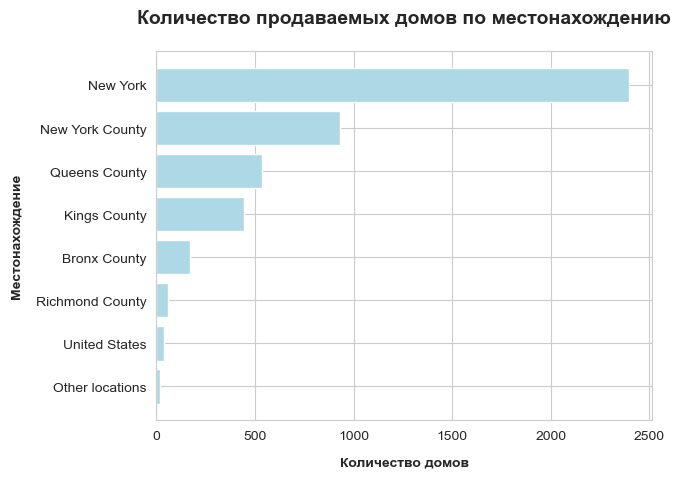

In [55]:
geopos = pd.DataFrame(houses["LOCALITY"].value_counts())
geopos = geopos.rename(columns={'count':'AMOUNT'})
geopos = geopos.reset_index()

other_geo = {"LOCALITY":"Other locations", "AMOUNT":geopos[geopos["AMOUNT"] < 30]["AMOUNT"].sum()}
geopos = geopos.drop(geopos[geopos["AMOUNT"] < 30].index)
geopos.loc[len(geopos)] = other_geo
geopos = geopos.sort_values(by='AMOUNT', ignore_index=True)

plt.barh(geopos['LOCALITY'], geopos["AMOUNT"], color='lightblue')
plt.title("Количество продаваемых домов по местонахождению", fontsize=14, fontweight="bold", loc='center', pad=20)
plt.xlabel('Количество домов', fontweight="bold", labelpad=10)
plt.ylabel('Местонахождение', fontweight="bold", labelpad=10)
plt.show()

# Выводы

Проанализировав данные я узнал:
- местоположение домов, отобразив дома на карте. Находятся они в Нью-Йорке и часть на острове Long Island;
- соотношение продаваемых домов по типам, построив круговую диаграмму. Выяснил, что самый популярный тип - "Co-op";
- о не сильной значимости взаимосвязи цены и количества кв. м., построив диаграмму рассеивания и вычислив статистические показатели. Показатель детерминации(0.2), это значит, что лишь 20% данных обуслвливаются такой зависимостью;
- большинство продаваемых домов находятся в Нью-Йорке. Наглядно отобразил на гистограмме.
